### Notebook for the manual annotation of cell states for all skin

- **Developed by:** Carlos Talavera-López Ph.D
- **Würzburg Institute for Systems Immunology & Julius-Maximilian-Universität Würzburg**
- v230706

### Import required modules

In [1]:
import anndata
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from SCCAF import SCCAF_assessment, plot_roc

### Set up working environment

In [2]:
sc.settings.verbosity = 3
sc.logging.print_versions()
sc.settings.set_figure_params(dpi = 180, color_map = 'RdPu', dpi_save = 300, vector_friendly = True, format = 'svg')

-----
anndata     0.8.0
scanpy      1.9.2
-----
PIL                 9.4.0
SCCAF               NA
appnope             0.1.3
asttokens           NA
backcall            0.2.0
cffi                1.15.1
colorama            0.4.6
comm                0.1.2
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.2
debugpy             1.6.6
decorator           5.1.1
executing           1.2.0
h5py                3.8.0
igraph              0.10.4
importlib_resources NA
ipykernel           6.21.2
ipywidgets          8.0.7
jedi                0.18.2
joblib              1.2.0
kiwisolver          1.4.4
leidenalg           0.9.1
llvmlite            0.39.1
louvain             0.8.0
matplotlib          3.7.0
mpl_toolkits        NA
natsort             8.2.0
numba               0.56.4
numexpr             2.8.4
numpy               1.23.5
packaging           23.0
pandas              1.5.3
parso               0.8.3
patsy               0.5.3
pexpect             4.8.0
pickleshare         0.7.

### Read in Human skin dataset

In [3]:
adata_skin = sc.read_h5ad('../data/SCC0120_1_Skin_scANVI_states_ctl230706.h5ad') 
adata_skin

AnnData object with n_obs × n_vars = 7479 × 27449
    obs: 'sample_id', 'Status', 'Site', 'Tissue', 'Location', 'donor_id', 'Sex', 'full_clustering', 'seed_labels', 'donor', 'cell_states', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_HTO', 'nFeature_HTO', 'nCount_CITE', 'nFeature_CITE', 'nCount_PROT', 'nFeature_PROT', 'percent.mt', 'sample', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification.global', 'hash.ID', 'tissue', 'condition', 'n_genes', 'doublet_scores', 'hashtag', 'unique', 'group', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'n_counts', 'percent_chrY', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'C_scANVI', 'skin_condition'
    var: 'gene_ids-SCC0120_1_skin', 'feature_types-SCC0120_1_skin', 'mt-SCC0120_1_skin', 'ribo-SCC0120_1_skin', 'n_cells_by_counts-SCC0120_1_skin', 'mean_counts-SCC0120_1_skin', 'pct_dropout_by_counts-SCC0120_1_sk

### Visualise manifold with `scANVI` annotation

/Users/cartalop/mambaforge/envs/scanpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/cartalop/mambaforge/envs/scanpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/cartalop/mambaforge/envs/scanpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/cartalop/mambaforge/envs/scanpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/cartalop/mambaforge/envs/scanpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No d

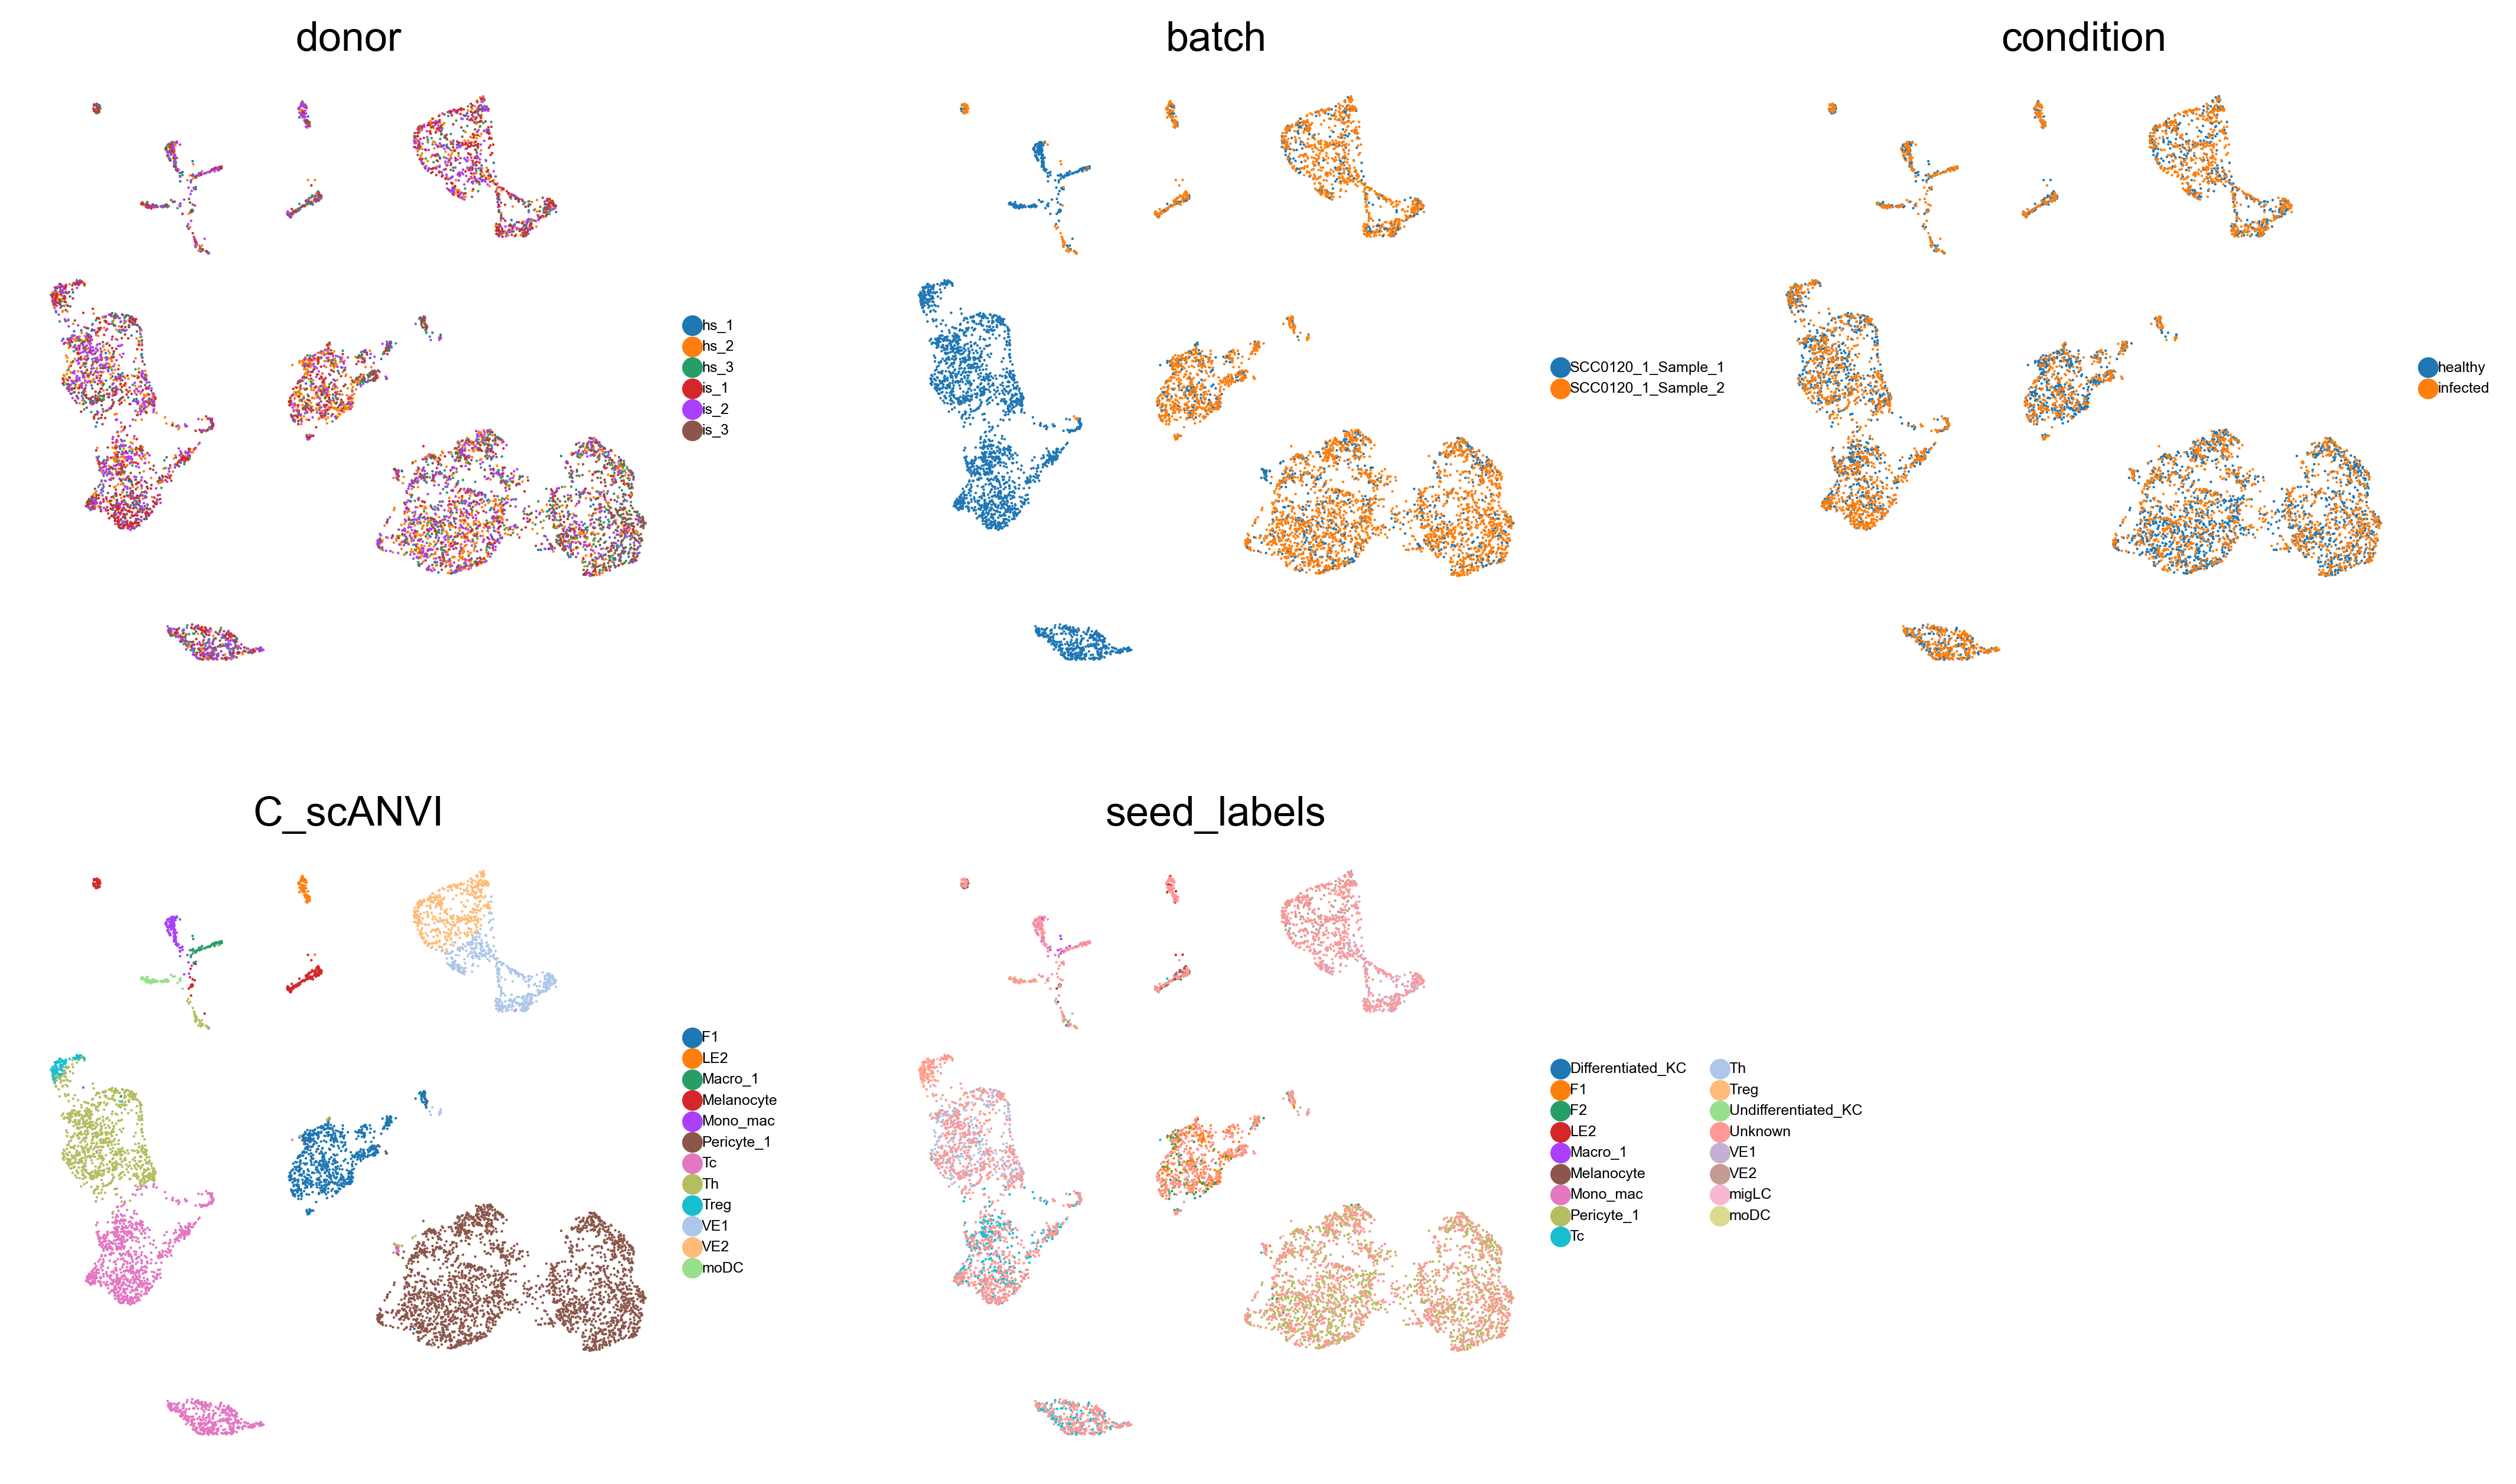

In [4]:
sc.pl.umap(adata_skin, frameon = False, color = ['donor', 'batch', 'condition', 'C_scANVI', 'seed_labels'], size = 3, legend_fontsize = 5, ncols = 3)

In [5]:
del(adata_skin.obs['seed_labels'])
adata_skin.obs['cell_type'] = adata_skin.obs['C_scANVI'].copy()

### Cluster manifold using `leiden`

In [6]:
sc.pp.neighbors(adata_skin, use_rep = "X_scANVI", n_neighbors = 50, metric = 'minkowski')
sc.tl.leiden(adata_skin, resolution = 0.6, random_state = 1712)

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:16)
running Leiden clustering
    finished: found 17 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:01)


/Users/cartalop/mambaforge/envs/scanpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/cartalop/mambaforge/envs/scanpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/cartalop/mambaforge/envs/scanpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/cartalop/mambaforge/envs/scanpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/cartalop/mambaforge/envs/scanpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No d

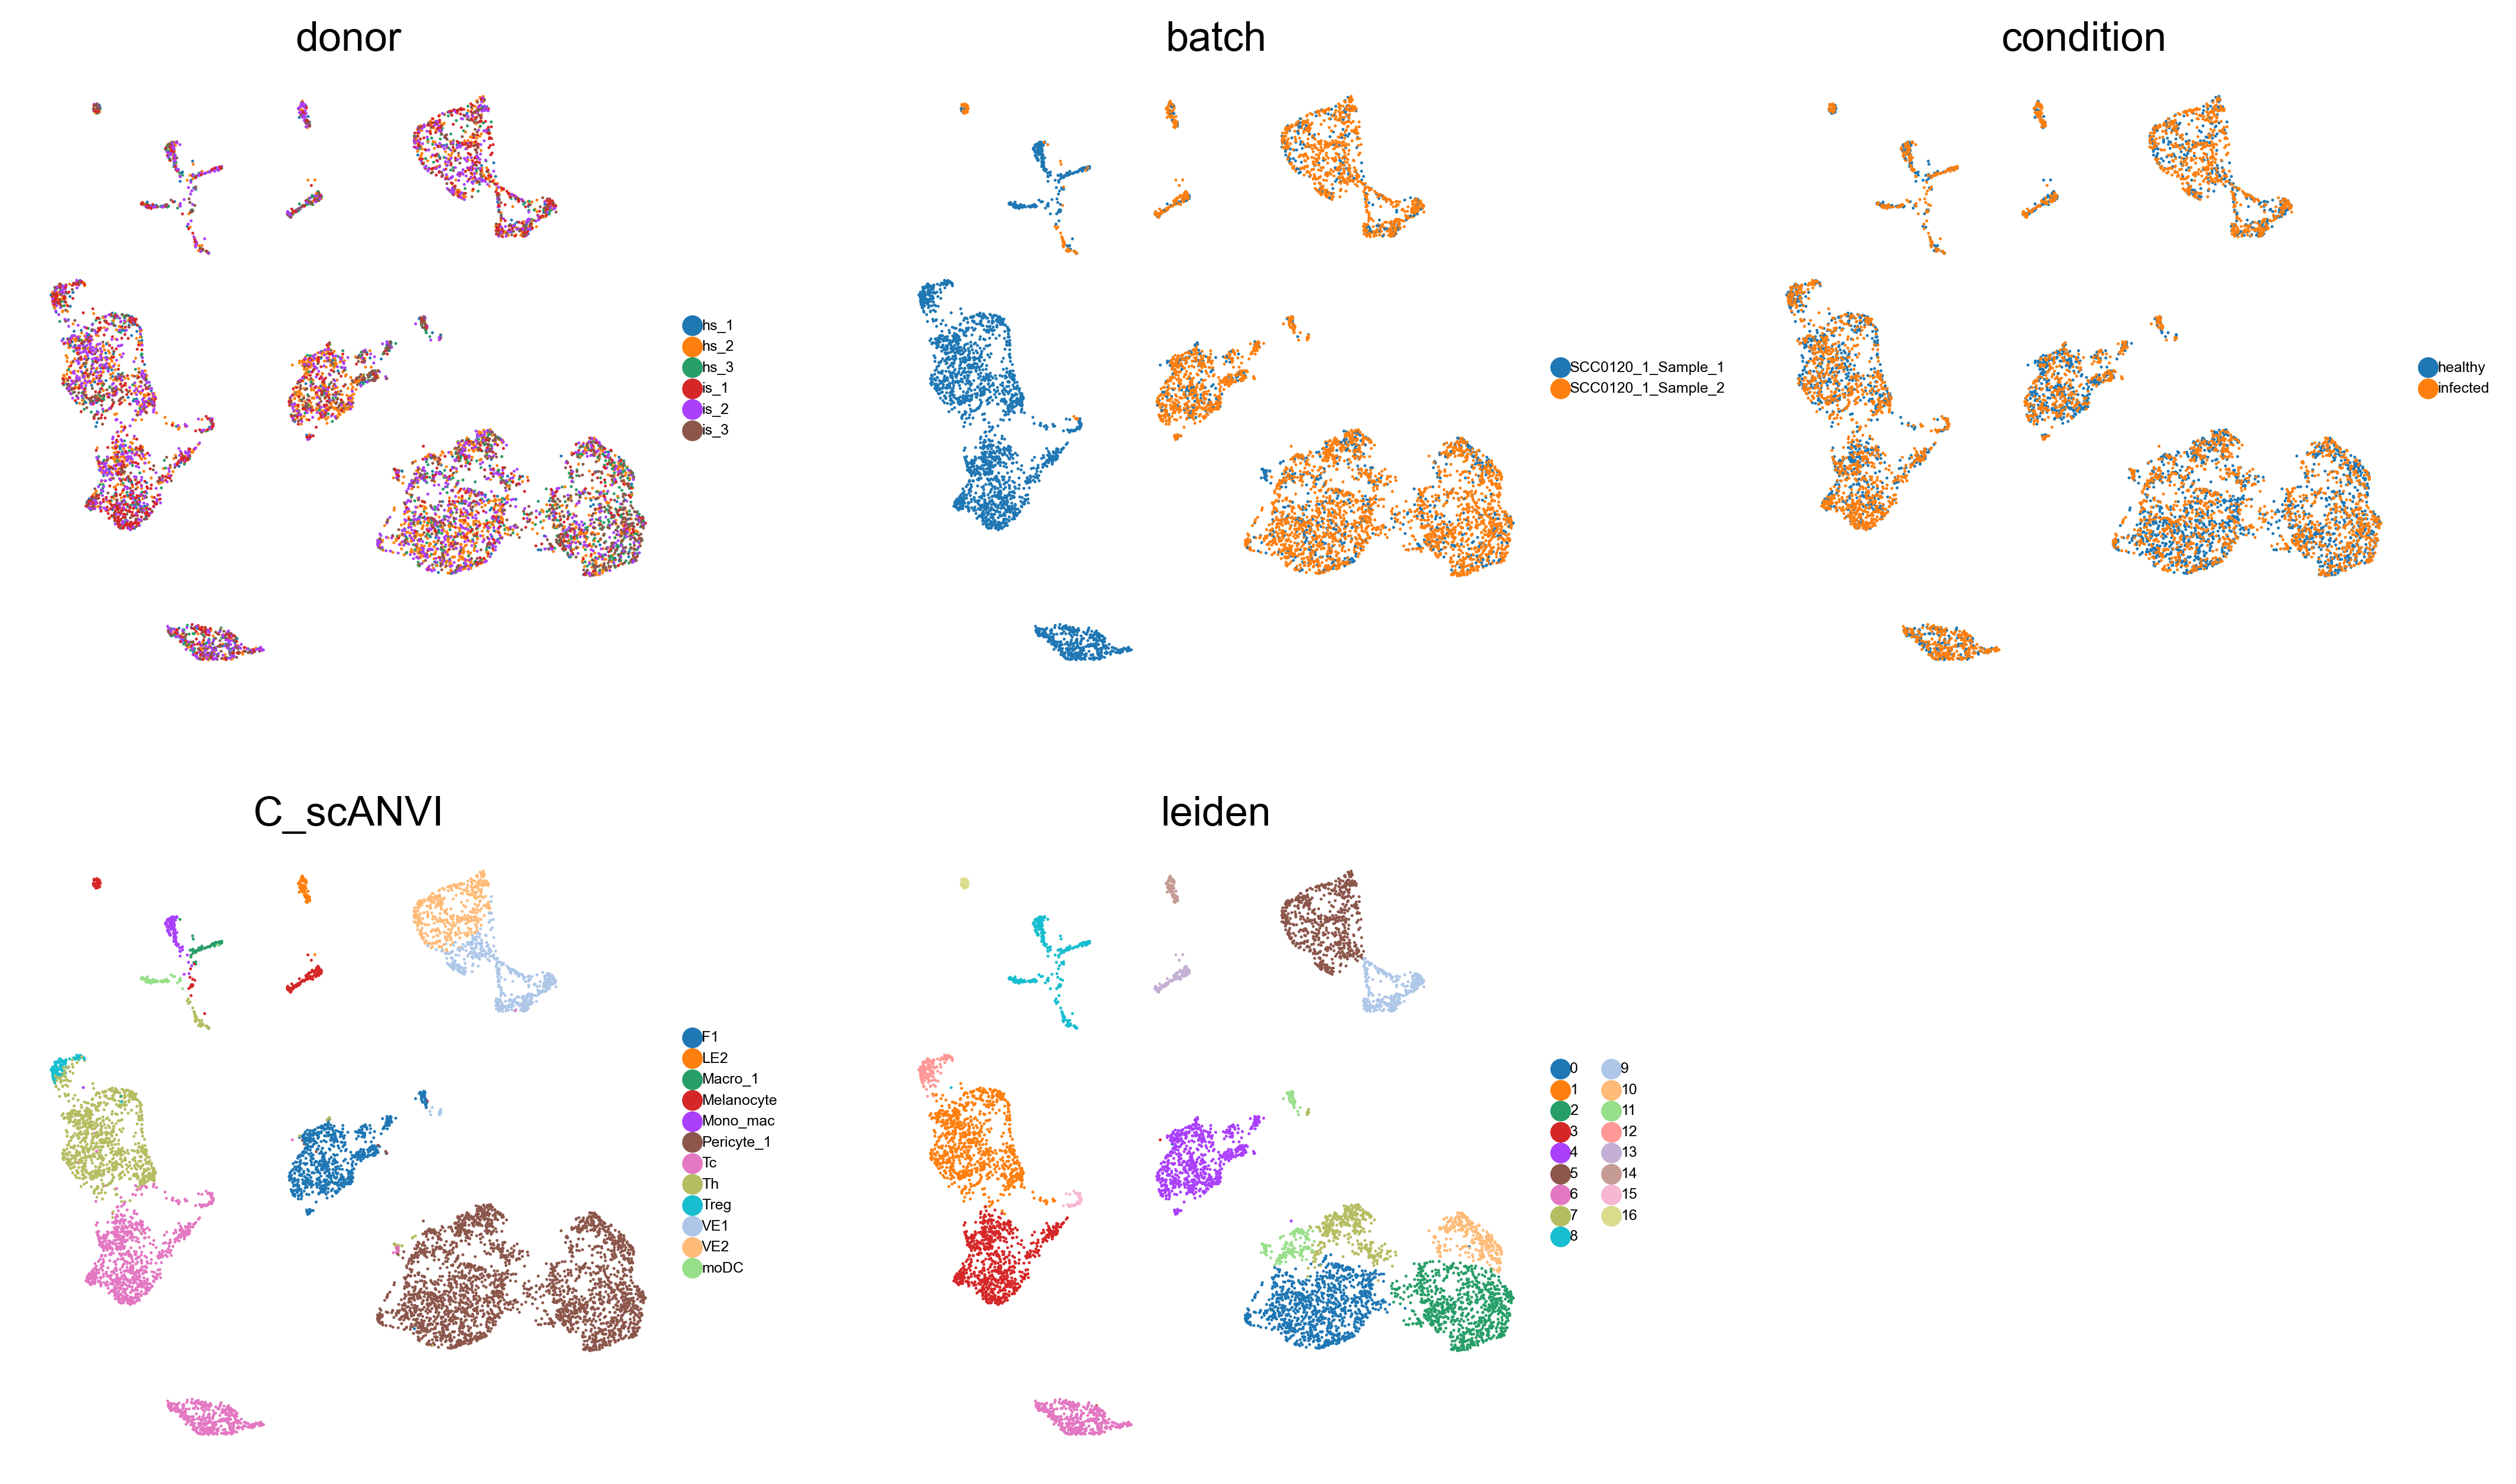

In [7]:
sc.pl.umap(adata_skin, frameon = False, color = ['donor', 'batch', 'condition', 'C_scANVI', 'leiden'], size = 4, legend_fontsize = 5, ncols = 3)

### Evaluate clustering accuracy with `SCCAF`

In [8]:
y_prob, y_pred, y_test, clf, cvsm, acc = SCCAF_assessment(adata_skin.X, adata_skin.obs['leiden'], n = 300)

Mean CV accuracy: 0.9094
Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.9185


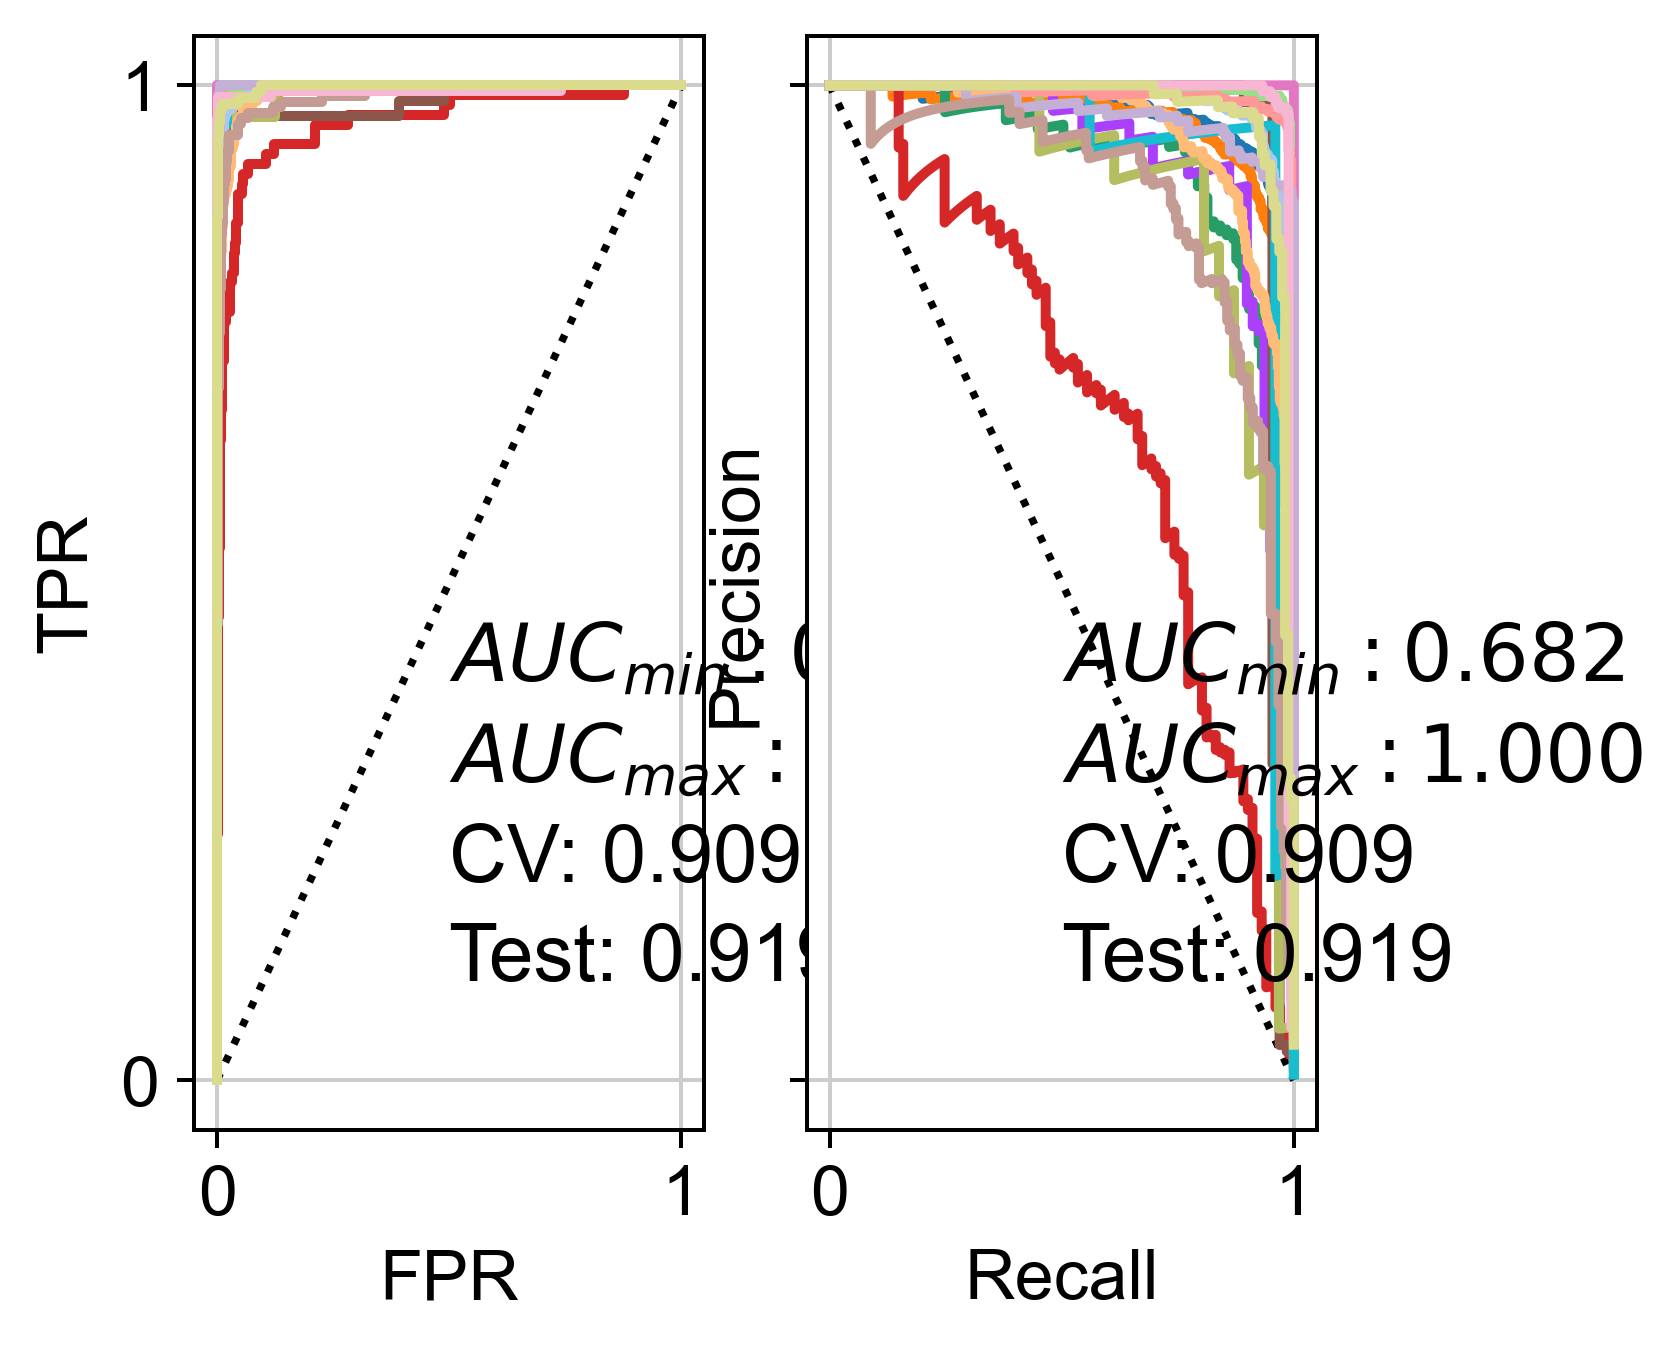

In [9]:
plot_roc(y_prob, y_test, clf, cvsm = cvsm, acc = acc)
plt.rcParams["figure.figsize"] = (16,6)
plt.show()

In [10]:
sc.settings.set_figure_params(dpi = 180, color_map = 'RdPu', dpi_save = 300, vector_friendly = True, format = 'svg')

In [11]:
adata_skin

AnnData object with n_obs × n_vars = 7479 × 27449
    obs: 'sample_id', 'Status', 'Site', 'Tissue', 'Location', 'donor_id', 'Sex', 'full_clustering', 'donor', 'cell_states', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_HTO', 'nFeature_HTO', 'nCount_CITE', 'nFeature_CITE', 'nCount_PROT', 'nFeature_PROT', 'percent.mt', 'sample', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification.global', 'hash.ID', 'tissue', 'condition', 'n_genes', 'doublet_scores', 'hashtag', 'unique', 'group', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'n_counts', 'percent_chrY', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'C_scANVI', 'skin_condition', 'cell_type', 'leiden'
    var: 'gene_ids-SCC0120_1_skin', 'feature_types-SCC0120_1_skin', 'mt-SCC0120_1_skin', 'ribo-SCC0120_1_skin', 'n_cells_by_counts-SCC0120_1_skin', 'mean_counts-SCC0120_1_skin', 'pct_dropout_by_counts-SCC0

### Rename cluster based on the cell type annotation

/Users/cartalop/mambaforge/envs/scanpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/cartalop/mambaforge/envs/scanpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


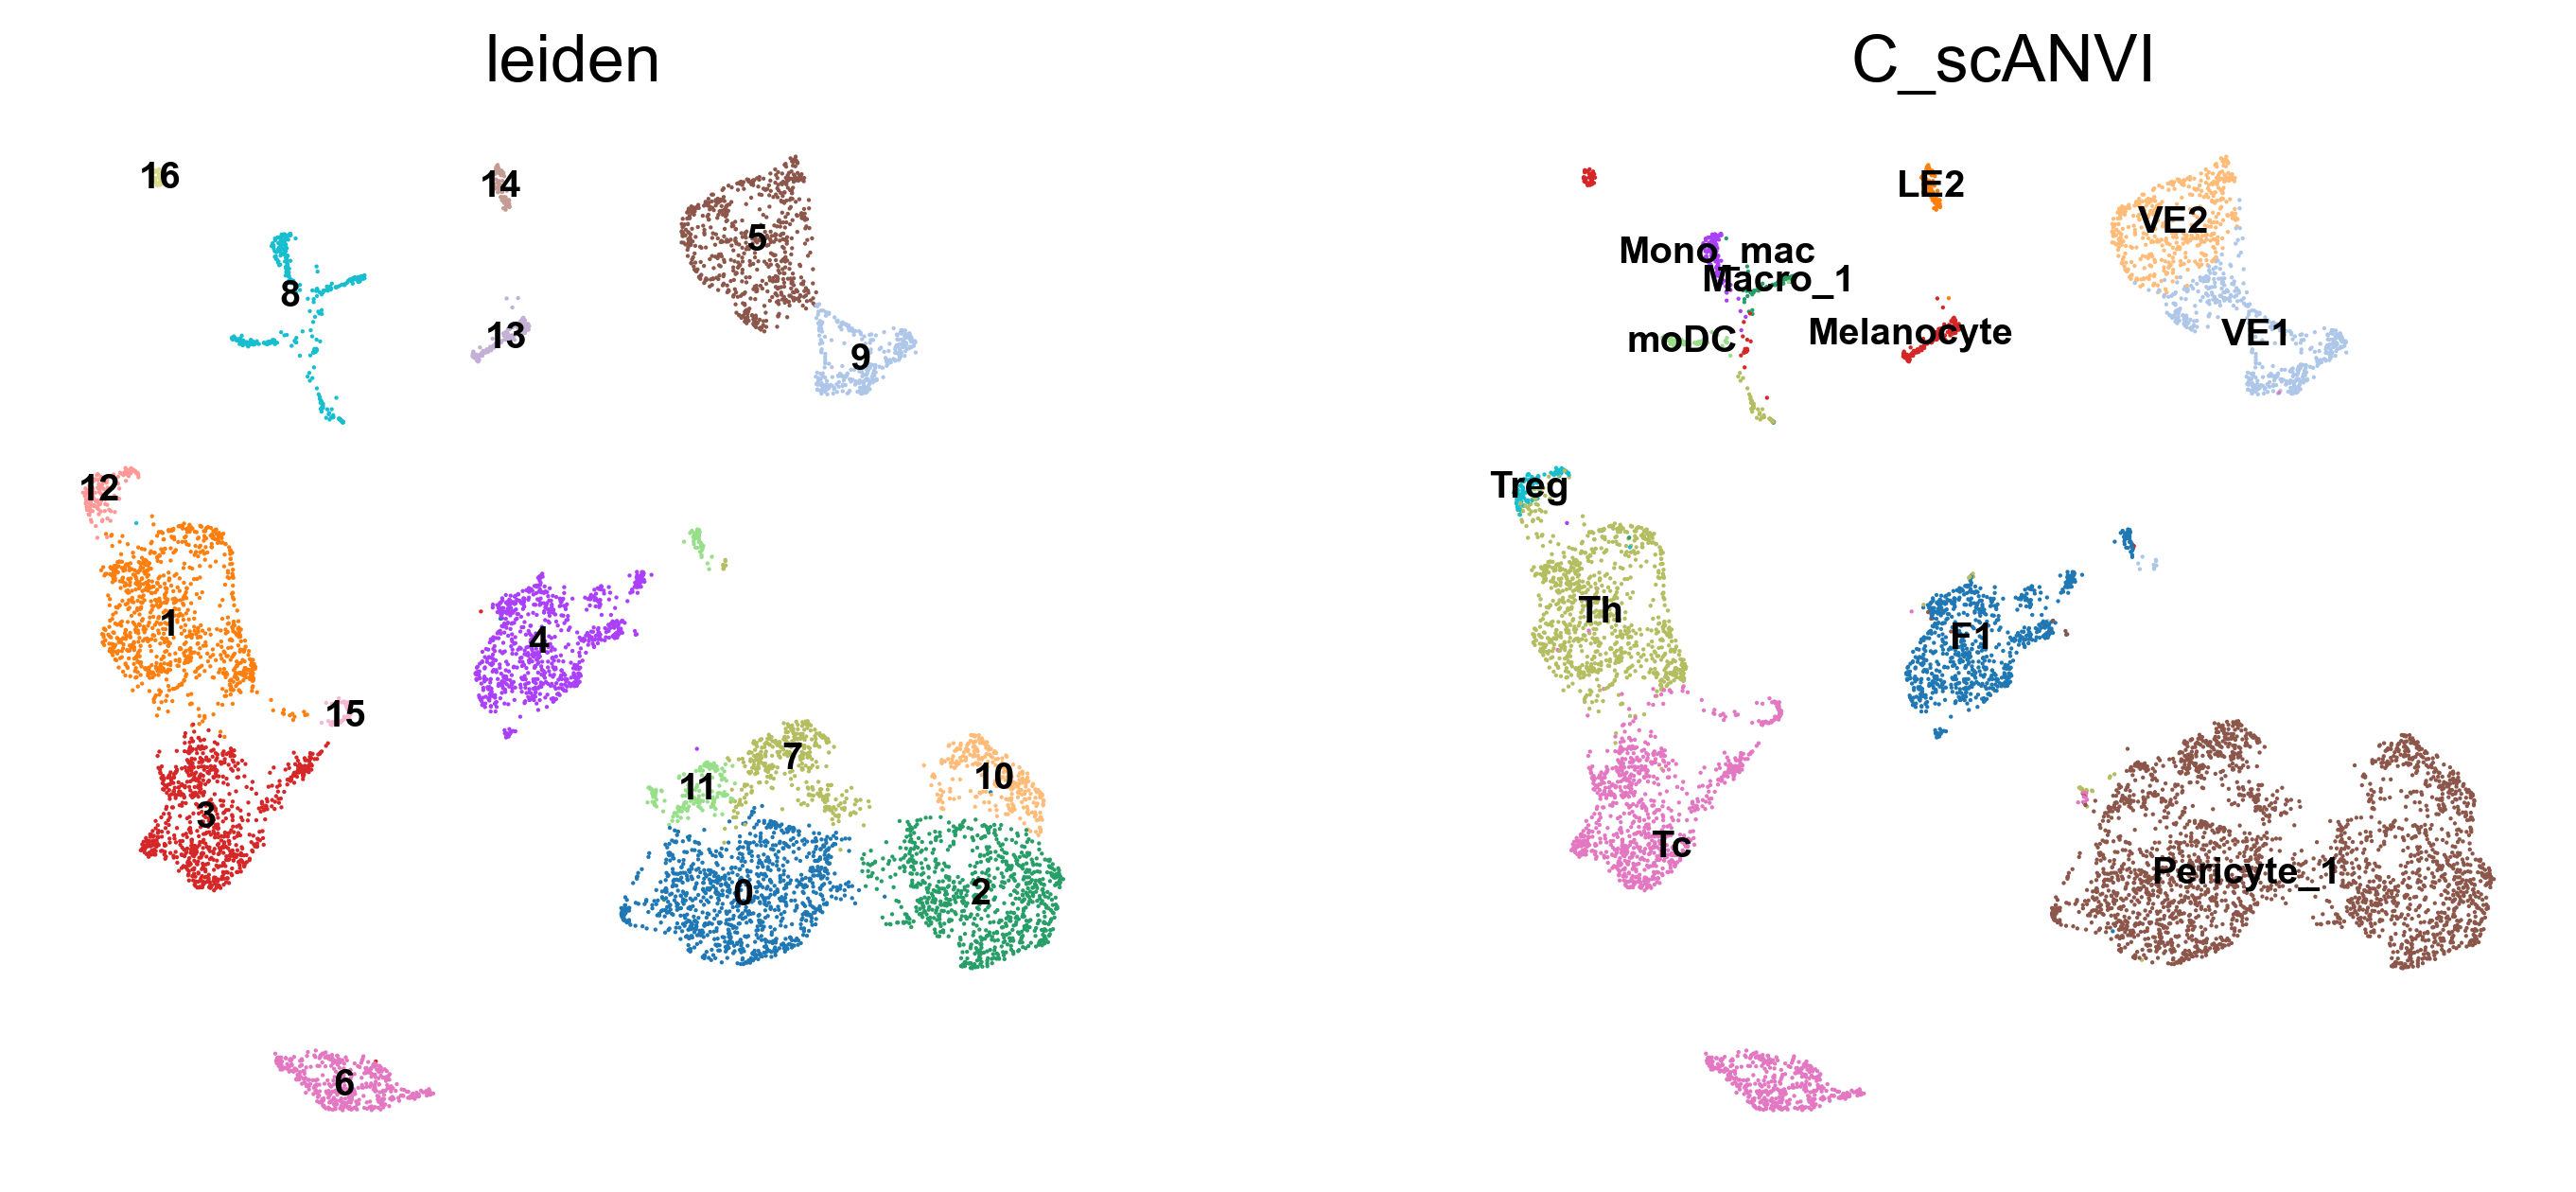

In [12]:
sc.pl.umap(adata_skin, frameon = False, color = ['leiden', 'C_scANVI'], size = 3, legend_fontsize = 8, ncols = 3, legend_loc = 'on data')

In [13]:
adata_skin.obs['leiden'].cat.categories

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16'],
      dtype='object')

/var/folders/rx/f17v355x1xqdpm4hlmym_zvw0000gn/T/ipykernel_40897/1586709933.py:2: FutureWarning: Setting categories in-place is deprecated and will raise in a future version. Use rename_categories instead.
  adata_skin.obs['leiden_states'].cat.categories = ['STEAP4+PC', 'CD69+CD4+T', 'RERGL+SMC', 'effCD8+T', 'CXCL14+FB', 'PLVAP+EC', 'NK', 'MSC-PC', 'CLECL7A+Myeloid', 'BTNL9+EC', 'vSMC', 'PC-SMC', 'CTLA4+Treg',
/Users/cartalop/mambaforge/envs/scanpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/cartalop/mambaforge/envs/scanpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/cartalop/mambaforge/envs/scanpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping p

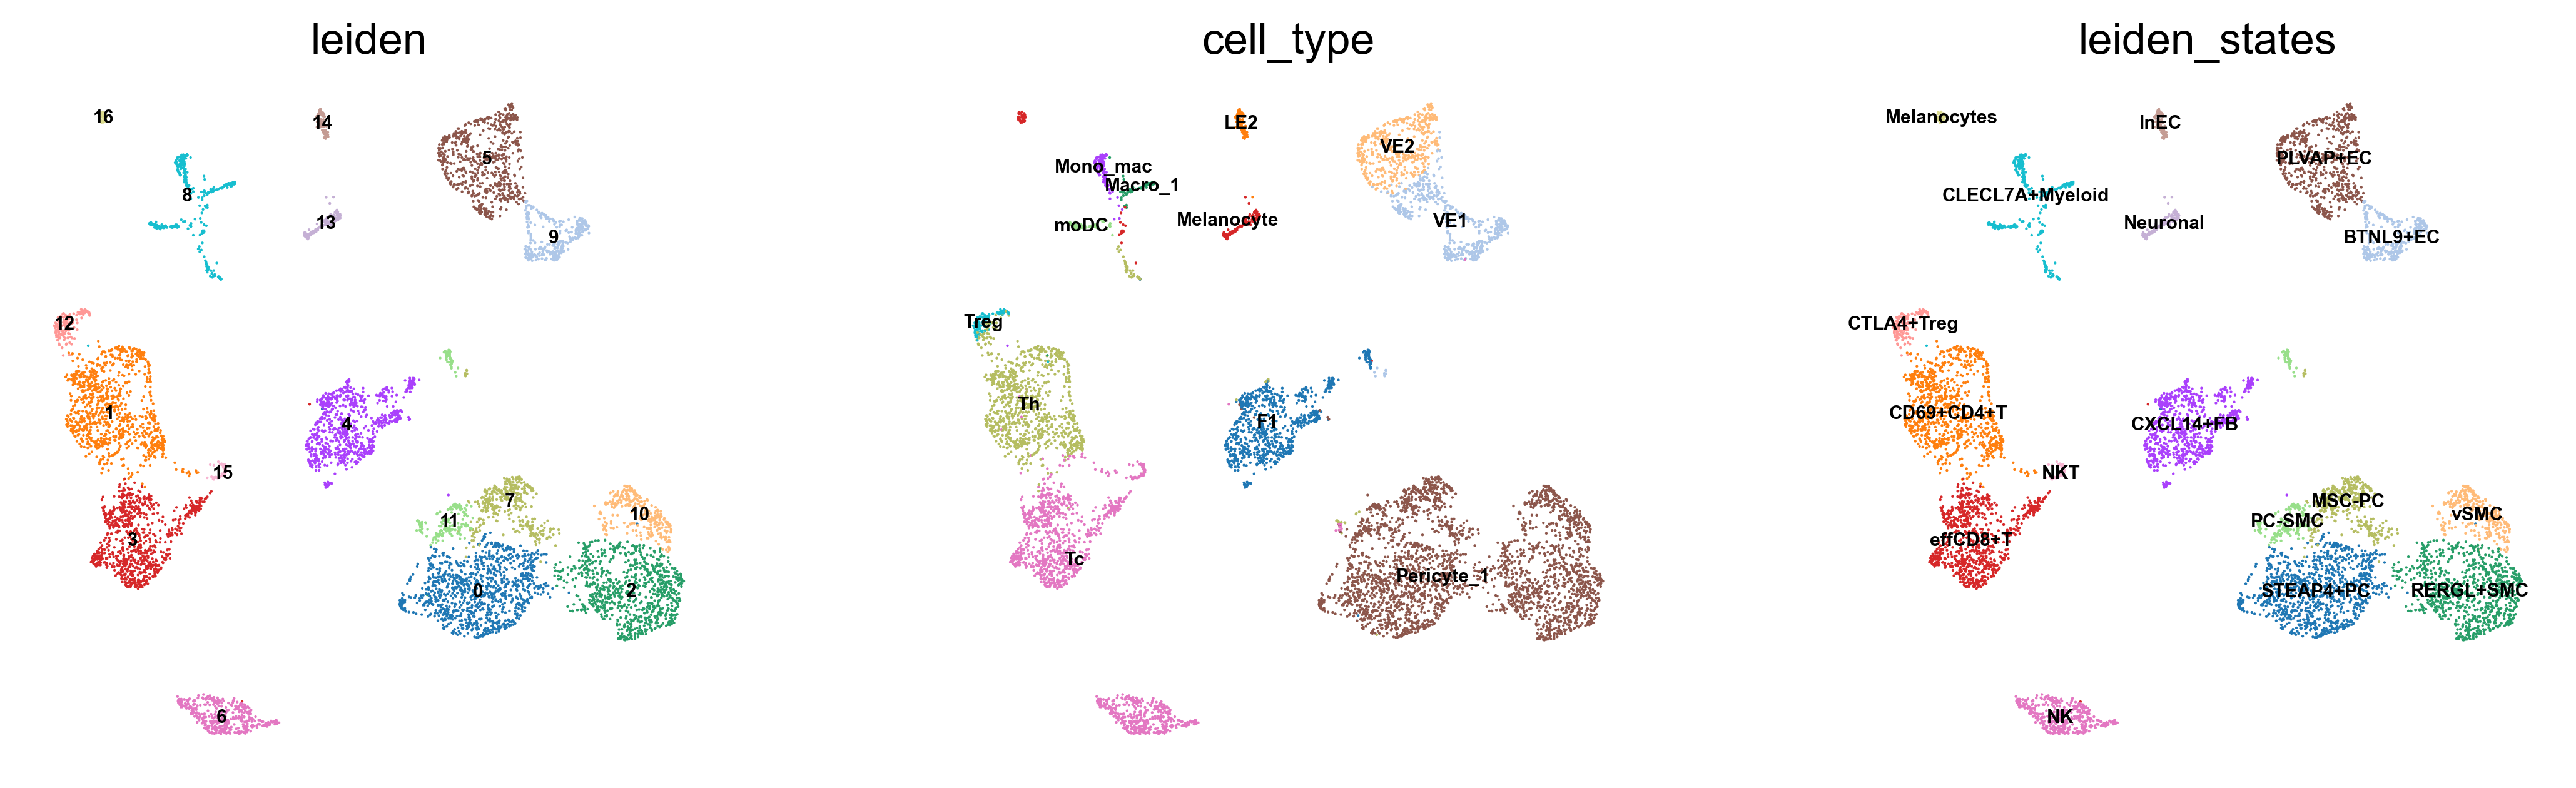

In [36]:
adata_skin.obs['leiden_states'] = adata_skin.obs['leiden']
adata_skin.obs['leiden_states'].cat.categories = ['STEAP4+PC', 'CD69+CD4+T', 'RERGL+SMC', 'effCD8+T', 'CXCL14+FB', 'PLVAP+EC', 'NK', 'MSC-PC', 'CLECL7A+Myeloid', 'BTNL9+EC', 'vSMC', 'PC-SMC', 'CTLA4+Treg',
       'Neuronal', 'lnEC', 'NKT', 'Melanocytes']
sc.pl.umap(adata_skin, frameon = False, color = ['leiden', 'cell_type', 'leiden_states'], size = 3, legend_fontsize = 6, ncols = 3, legend_loc = 'on data')

/Users/cartalop/mambaforge/envs/scanpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/cartalop/mambaforge/envs/scanpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


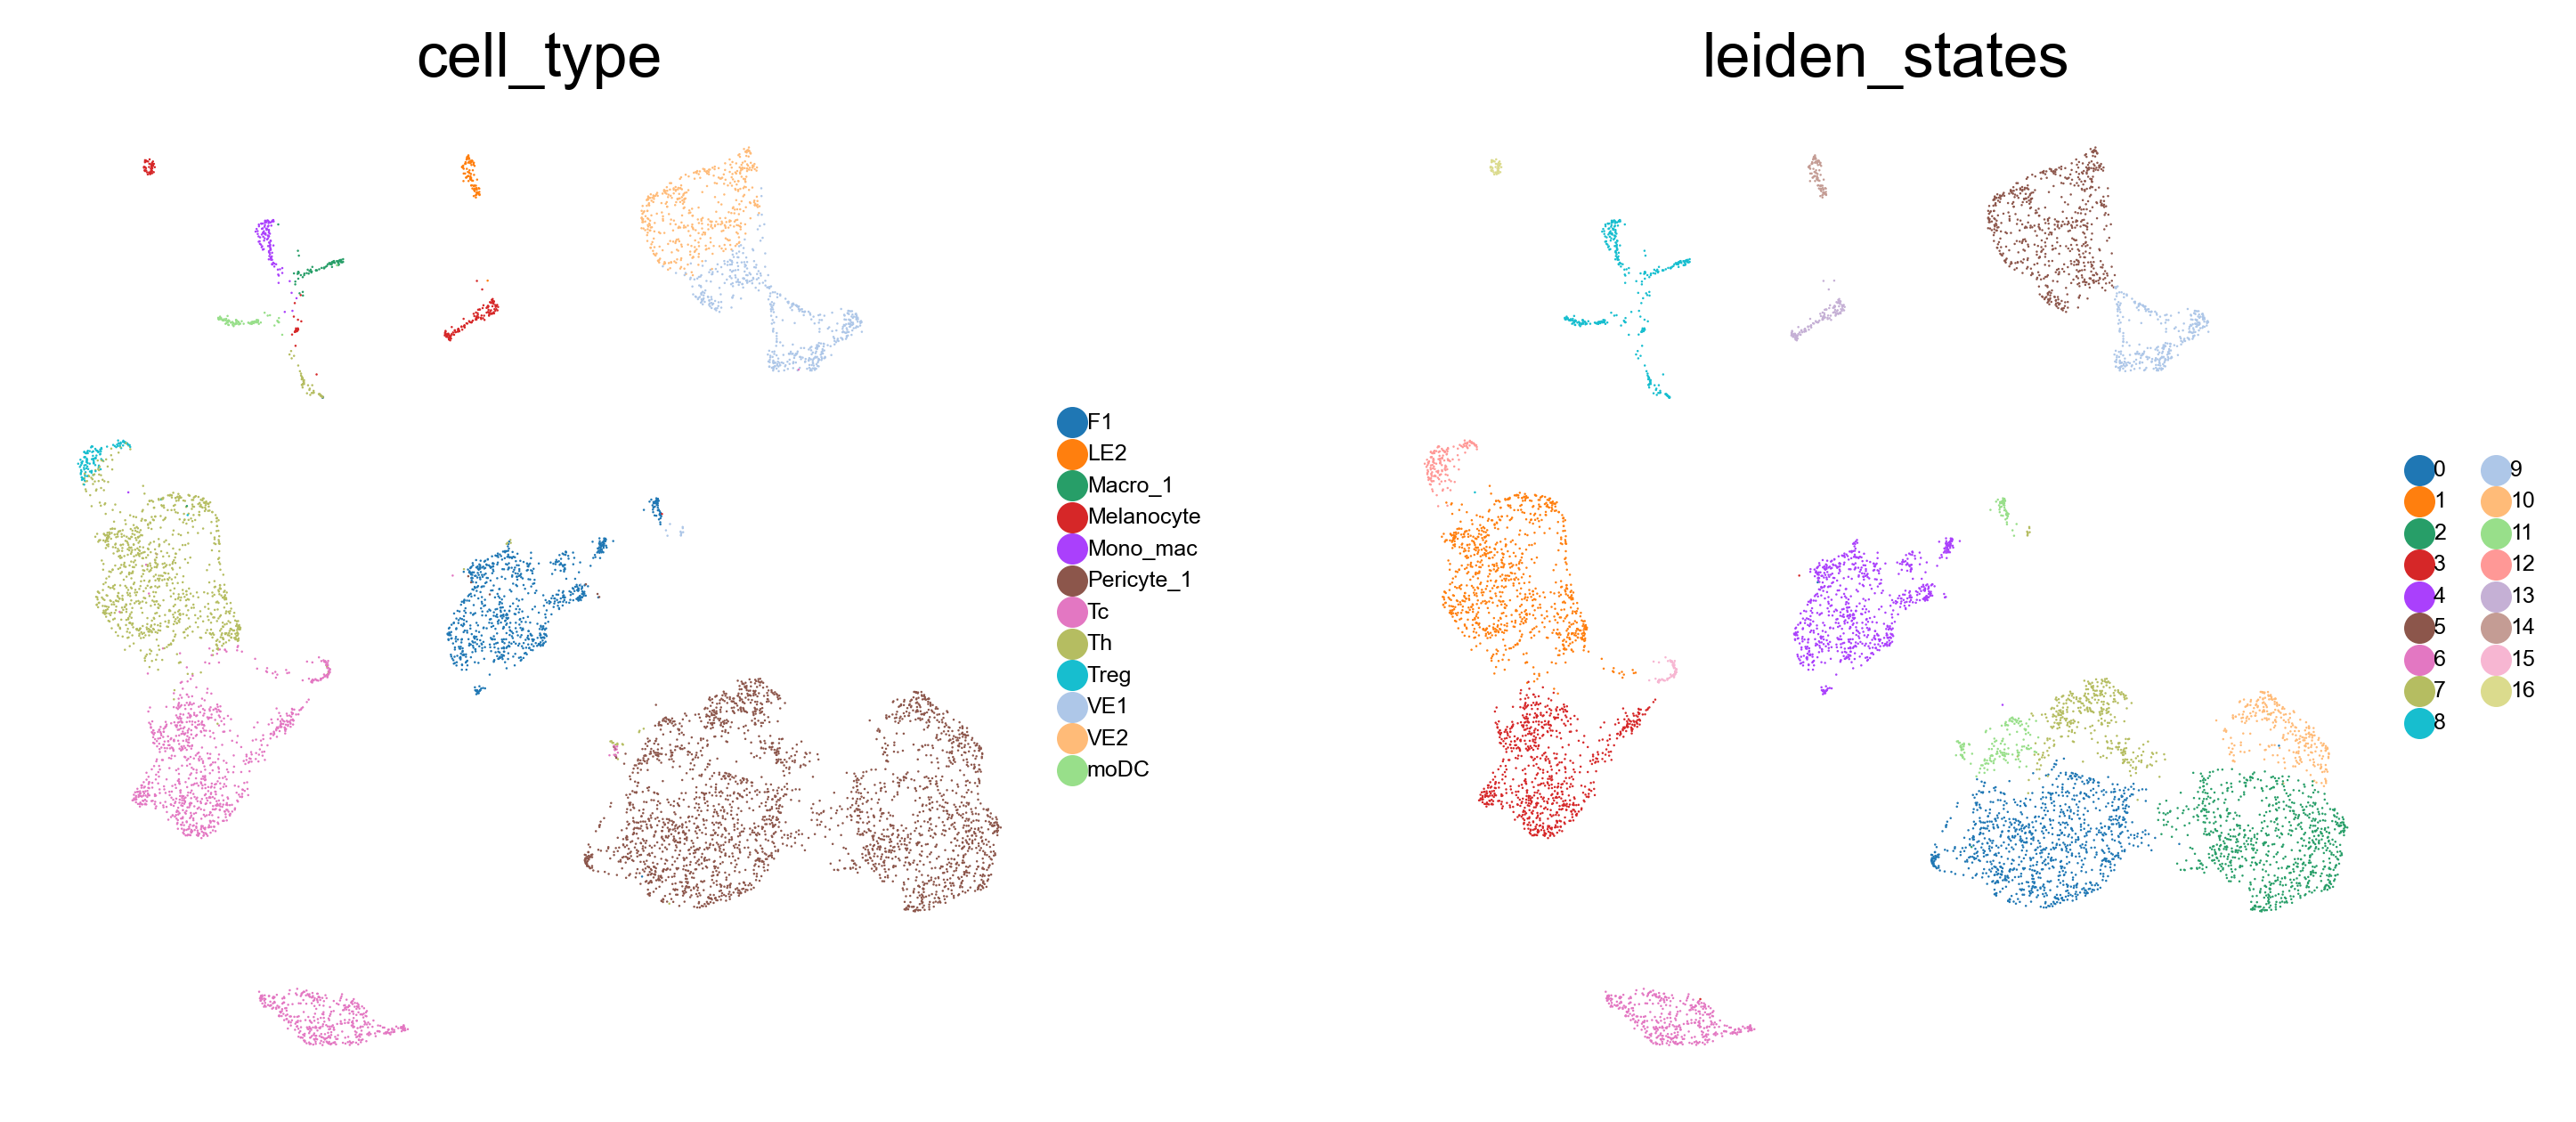

In [15]:
sc.pl.umap(adata_skin, frameon = False, color = ['cell_type', 'leiden_states'], size = 1, legend_fontsize = 5, ncols = 2)

### Calculate cluster-specific marker genes using _Wilcoxon's Rank Sum Test_

In [41]:
adata_log = adata_skin.copy()
adata_log

AnnData object with n_obs × n_vars = 7479 × 27449
    obs: 'sample_id', 'Status', 'Site', 'Tissue', 'Location', 'donor_id', 'Sex', 'full_clustering', 'donor', 'cell_states', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_HTO', 'nFeature_HTO', 'nCount_CITE', 'nFeature_CITE', 'nCount_PROT', 'nFeature_PROT', 'percent.mt', 'sample', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification.global', 'hash.ID', 'tissue', 'condition', 'n_genes', 'doublet_scores', 'hashtag', 'unique', 'group', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'n_counts', 'percent_chrY', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'C_scANVI', 'skin_condition', 'cell_type', 'leiden', 'leiden_states'
    var: 'gene_ids-SCC0120_1_skin', 'feature_types-SCC0120_1_skin', 'mt-SCC0120_1_skin', 'ribo-SCC0120_1_skin', 'n_cells_by_counts-SCC0120_1_skin', 'mean_counts-SCC0120_1_skin', 'pct_dropo

In [42]:
sc.pp.normalize_total(adata_log, target_sum = 1e6, exclude_highly_expressed = True)
sc.pp.log1p(adata_log)

normalizing counts per cell The following highly-expressed genes are not considered during normalization factor computation:
[]
    finished (0:00:00)


In [43]:
sc.tl.rank_genes_groups(adata_log, 'leiden_states', method = 'wilcoxon', n_genes = 100, use_raw = False)
result = adata_log.uns['rank_genes_groups']
groups = result['names'].dtype.names
wilcox_markers = pd.DataFrame(
{group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names','logfoldchanges', 'pvals_adj']})
wilcox_markers.head(10)

ranking genes


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:25)


STEAP4+PC_n  STEAP4+PC_l    STEAP4+PC_p CD69+CD4+T_n  CD69+CD4+T_l  \
0      STEAP4     7.872015   0.000000e+00         IL7R      8.053701   
1       TAGLN     6.247363   0.000000e+00       BCL11B      6.978248   
2       PRRX1     5.758127  1.903831e-275       THEMIS      7.761858   
3        RERG     6.317567  3.578542e-269        PTPRC      6.834652   
4       NR2F2     5.651252  4.685831e-268        SKAP1      6.968441   
5        CD36     6.509029  1.476879e-267         FYB1      6.386441   
6       ACTA2     5.928448  1.599113e-265        IKZF1      6.422590   
7        FHL2     6.730368  8.280456e-246        CAMK4      7.490408   
8        MYL9     5.333623  1.717575e-244         CD96      6.480771   
9       ABCC9     6.101023  3.472550e-244     ARHGAP15      5.278045   

    CD69+CD4+T_p RERGL+SMC_n  RERGL+SMC_l    RERGL+SMC_p effCD8+T_n  ...  \
0   0.000000e+00      MUSTN1     7.927450   0.000000e+00       CCL5  ...   
1   0.000000e+00        TPM2     6.828068   0.000000e+00       NKG7  ...   
2   0.000000e+00        MYL9     5.919927  6.146828e-283       GZMA  ...   
3   0.000000e+00       TAGLN     6.379871  6.303877e-274      SAMD3  ...   
4  1.426739e-304       RERGL     8.884571  7.621740e-273      KLRK1  ...   
5  1.636677e-284       MYH11     6.690634  2.587083e-269       HCST  ...   
6  3.918890e-284     GUCY1A1     6.791104  1.028687e-265      PTPRC  ...   
7  1.498063e-283       ADIRF     4.729964  2.430936e-262       CST7  ...   
8  2.139217e-266    C11orf96     6.530249  1.301494e-260       CTSW  ...   
9  1.038061e-259       ACTA2     6.211399  6.908474e-257     CORO1A  ...   

     Neuronal_p     lnEC_n     lnEC_l        lnEC_p     NKT_n     NKT_l  \
0  1.268899e-76      MMRN1  11.291513  5.584954e-52  TNFRSF18  8.421775   
1  8.151365e-76    PKHD1L1  14.171141  7.695411e-52      CAPG  7.324503   
2  1.233538e-74  LINC02147  11.792518  3.912177e-45      CLNK  9.591095   
3  2.387887e-74      SMAD1   7.869534  4.153893e-39    TYROBP  7.122485   
4  2.207860e-71      PROX1  12.020221  4.153893e-39      XCL1  7.929840   
5  2.261803e-71      CCL21  11.190281  7.165668e-38     VAMP8  6.043299   
6  3.305747e-71    PPFIBP1   6.669125  7.165668e-38     KLRB1  6.846964   
7  4.441387e-69      GPM6A  10.529287  2.079095e-37    FCER1G  6.931150   
8  7.100102e-69      PTPRE   6.660303  2.552674e-37       LTB  6.176055   
9  1.336216e-65    RASGRP3   8.332777  3.243390e-37      IL7R  6.495801   

          NKT_p  Melanocytes_n Melanocytes_l  Melanocytes_p  
0  1.471613e-23            KIT     11.353291   2.213993e-28  
1  1.138689e-20           FMN1     10.435761   2.213993e-28  
2  4.494909e-18            TYR     15.008289   2.213993e-28  
3  1.110966e-17            DCT     13.730671   2.213993e-28  
4  1.417684e-17          LSAMP     10.050660   2.213993e-28  
5  4.365543e-17          TYRP1     14.711526   5.481923e-25  
6  4.456339e-17         TFAP2B     13.011792   7.305702e-25  
7  3.798470e-16          CAPN3      8.965282   7.367856e-24  
8  2.096637e-15          NRXN3      9.182209   8.333743e-24  
9  2.817486e-15           PAX3     10.057468   1.461964e-23  

[10 rows x 51 columns]

In [44]:
wilcox_markers.to_csv('Skin_ctl230707_cell_states_WilcoxRST_markers.csv', sep = ',', index = False)

### Export annotated object

In [39]:
adata_skin

AnnData object with n_obs × n_vars = 7479 × 27449
    obs: 'sample_id', 'Status', 'Site', 'Tissue', 'Location', 'donor_id', 'Sex', 'full_clustering', 'donor', 'cell_states', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_HTO', 'nFeature_HTO', 'nCount_CITE', 'nFeature_CITE', 'nCount_PROT', 'nFeature_PROT', 'percent.mt', 'sample', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification.global', 'hash.ID', 'tissue', 'condition', 'n_genes', 'doublet_scores', 'hashtag', 'unique', 'group', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'n_counts', 'percent_chrY', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'C_scANVI', 'skin_condition', 'cell_type', 'leiden', 'leiden_states'
    var: 'gene_ids-SCC0120_1_skin', 'feature_types-SCC0120_1_skin', 'mt-SCC0120_1_skin', 'ribo-SCC0120_1_skin', 'n_cells_by_counts-SCC0120_1_skin', 'mean_counts-SCC0120_1_skin', 'pct_dropo

In [40]:
adata_skin.write('../data/SCC0120_1_Skin_scANVI_cell_states_ctl230707.h5ad')